In [30]:
# import statsmodels.api as sm
# import xgboost as xgb
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from datetime import datetime, timedelta
import calendar
import math

In [19]:
def create_df(start_date, end_date):
    df = pd.DataFrame(pd.date_range(start_date, end_date))
    df.columns = ['Date']
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df.drop(columns=['Date'], axis=1, inplace=True)
    df = df.groupby([(df.Year), (df.Month)]).sum()
    df = df.reset_index()
    df['Date'] = ''
    for index, row in df.iterrows():
        df.loc[index, ('Date')] = f'{df.loc[index, "Year"]}-{df.loc[index, "Month"] if df.loc[index, "Month"] > 9 else "0" + str(df.loc[index, "Month"])}-{calendar.monthrange(df.loc[index, "Year"], df.loc[index, "Month"])[1]}'
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.index = pd.DatetimeIndex(df.Date.values)
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Dayofweek'] = df['Date'].dt.dayofweek
    df.drop(columns=['Date'], axis=1, inplace=True)
    return df

In [46]:
def arima_periods(arima_border, end_date):
    return abs(math.ceil((datetime.strptime(arima_border, '%Y-%m-%d') - datetime.strptime(end_date, '%Y-%m-%d')).days / 30.0))

In [3]:
with open('veresk_model', 'rb') as file:  
    loaded_arima = pickle.load(file)

In [4]:
loaded_arima.predict(n_periods=6)

array([1064563.21664096, 1090870.70624168, 1138310.4006623 ,
       1061417.46172752, 1124642.23820713, 1311316.73189427])

In [25]:
create_df('2022-01-01', '2022-10-04')

,Year,Month,Dayofweek
2022-01-31,2022,1,0
2022-02-28,2022,2,0
2022-03-31,2022,3,3
2022-04-30,2022,4,5
2022-05-31,2022,5,1
2022-06-30,2022,6,3
2022-07-31,2022,7,6
2022-08-31,2022,8,2
2022-09-30,2022,9,4
2022-10-31,2022,10,0


In [26]:
arima_periods('2022-01-01', '2022-10-04')

-276

In [31]:
math.ceil(276 / 30.0)

10

In [75]:
def xgboost_image(start_date, end_date):
    with open('romashka_model', 'rb') as file:
        loaded_xgboost = pickle.load(file)
        df = create_df(start_date, end_date)
        predictions = pd.DataFrame(loaded_xgboost.predict(df)).set_index(df.index)
        fig = plt.figure(figsize=(18, 12))
        ax = fig.add_subplot()
        ax.plot(predictions, color='green', label='Предсказанный ряд')
        plt.legend(loc='upper left')
        plt.title(f'Предсказания для фермы "Ромашка" (алгоритм XGBRegressor) для периода: {start_date} - {end_date}')
        plt.xticks(predictions.index, rotation=45)
        plt.grid(True)
        plt.savefig('foo.png')
        plt.show() 
        plt.close()

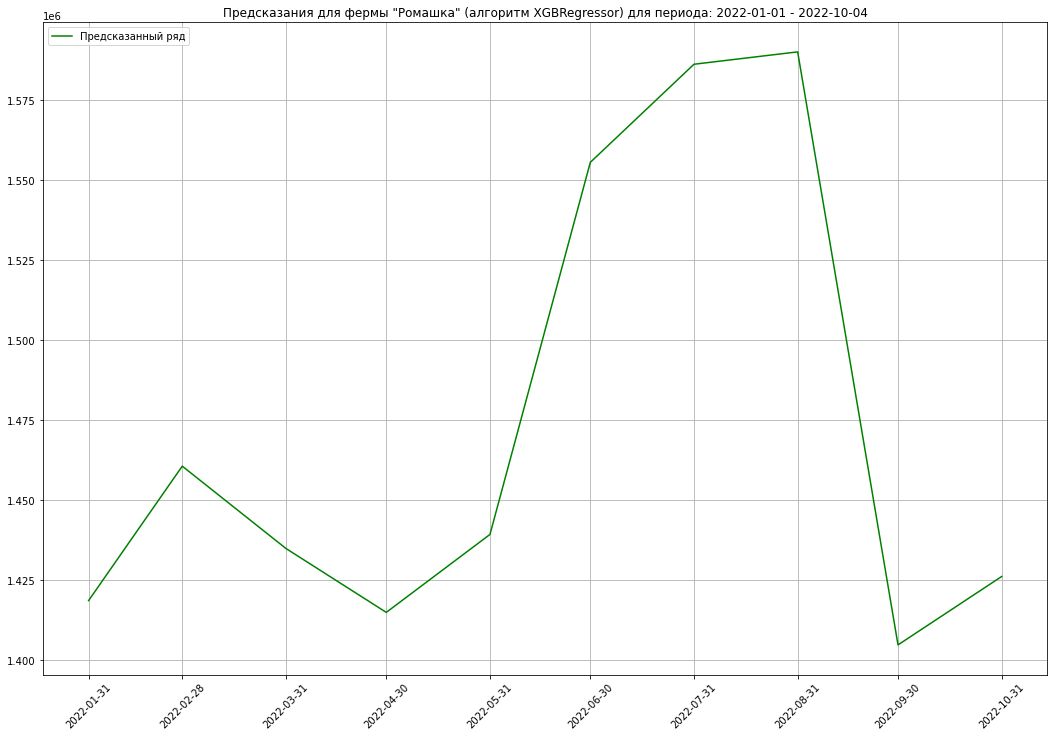

In [76]:
xgboost_image('2022-01-01', '2022-10-04')

In [77]:
def arima_image(start_date, end_date):
    with open('veresk_model', 'rb') as file:
        loaded_arima = pickle.load(file)
        df = create_df('2022-01-31', end_date)
        predictions = pd.DataFrame(loaded_arima.predict(len(df))).set_index(df.index)
        predictions_part = predictions.loc[(predictions.index >= start_date) & (predictions.index <= end_date)].copy()
        fig = plt.figure(figsize=(18, 12))
        ax = fig.add_subplot()
        ax.plot(predictions_part, color='green', label='Предсказанный ряд')
        plt.legend(loc='upper left')
        plt.title(f'Предсказания для фермы "Вереск" (алгоритм SARIMA) для периода: {start_date} - {end_date}')
        plt.xticks(predictions_part.index, rotation=45)
        plt.grid(True)
        plt.savefig('foo2.png')
        plt.show() 
        plt.close()

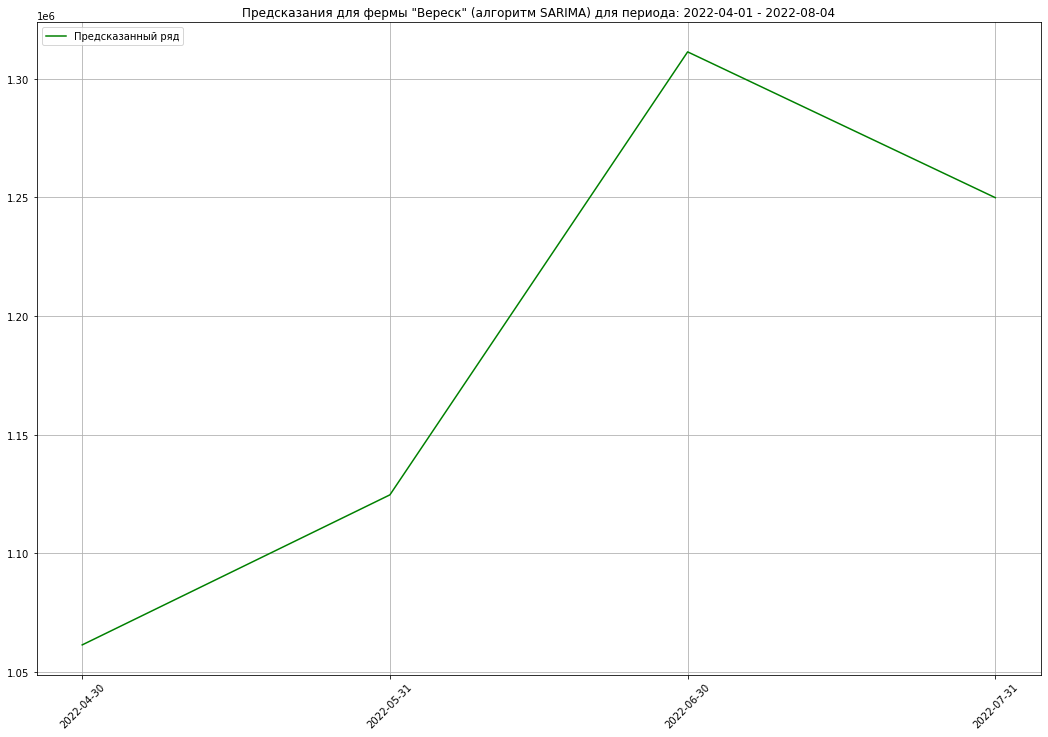

In [78]:
arima_image('2022-04-01', '2022-08-04')

In [66]:
arima_periods('2022-01-31', '2022-08-04')

6